In [2]:
# TODO: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


In [1]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (_, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# TODO: Flatten images into (num_samples, num_features)
# Hint: X.reshape(len(X), -1)
X_flat = X_train.reshape(len(X_train), -1)

In [6]:
# TODO: Initialize PCA with n_components = 50
# Fit PCA on flattened images
pca = PCA(n_components=50)
pca.fit(X_flat)


PCA(n_components=50)

In [7]:
# TODO: Transform and inverse_transform using PCA
X_pca = pca.transform(X_flat)
X_reconstructed = pca.inverse_transform(X_pca)


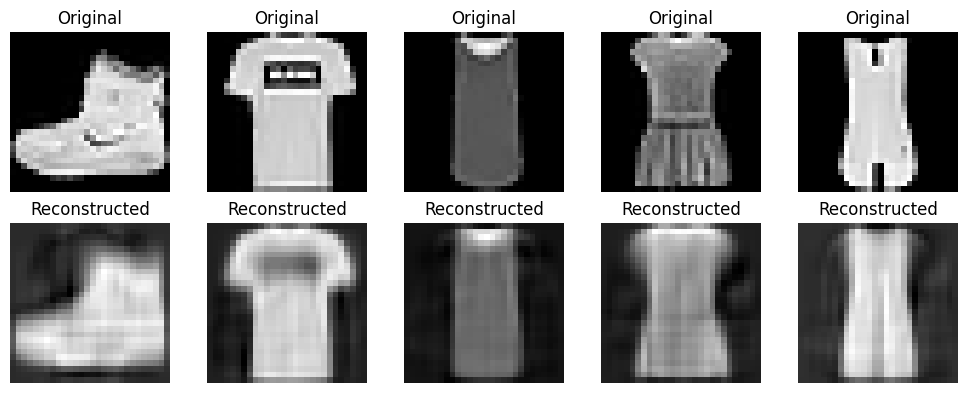

In [9]:
# TODO: Plot original vs reconstructed images using matplotlib
n_images = 5

plt.figure(figsize=(10, 4))

for i in range(n_images):
    # Original images
    plt.subplot(2, n_images, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

1. What information is lost during PCA?
PCA removes low-variance components, which often include fine-grained pixel variations, small stroke thickness details, noise and subtle texture information
These components contribute less to overall variance but can still contain important local details.
PCA keeps directions with maximum variance, not necessarily those most important for visual sharpness.

2. Why does reconstruction blur fine details?
Reconstruction blur occurs because
1.Dimensionality reduction
2.Only 50 out of 64 principal components are retained
3.High-frequency details are discarded
4.Sharp edges and fine strokes lie in lower-variance components
5.Linear approximation
PCA reconstructs images as a linear combination of principal directions cannot capture complex nonlinear patterns. As more components are removed, images become smoother and blurrier.